<h3 align="right">mCP, &nbsp; dSPN, &nbsp; 150917_c6_D1, &nbsp; animal_1_n24_04102017_cel1 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/animal_1_n24_04102017_cel1.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_499.soma.v': 'expdata/ECBL_IV_ch5_499.dat',
    'IV_502.soma.v': 'expdata/ECBL_IV_ch5_502.dat',    
    'IDthresh-sub_541.soma.v': 'expdata/ECBL_IDthresh_ch5_541.dat',    
    'IDthresh_543.soma.v': 'expdata/ECBL_IDthresh_ch5_543.dat',    
    'IDthresh_544.soma.v': 'expdata/ECBL_IDthresh_ch5_544.dat',    
    'IDthresh_553.soma.v': 'expdata/ECBL_IDthresh_ch5_553.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/animal_1_n24_04102017_cel1.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.ba

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


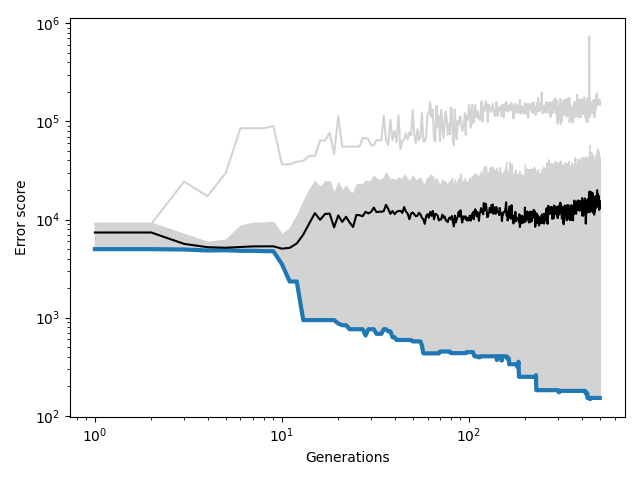

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.01207,0.01207,0.01191,0.01226,0.01303,0.01125,0.01346,0.01183,0.01327,0.01404
g_pas.somatic,8.5e-05,8.5e-05,2.626e-05,7.901e-05,9.858e-05,0.0002334,7.802e-05,7.901e-05,9.743e-05,2.8e-05
g_pas.basal,1.009e-05,1.014e-05,1.014e-05,1.014e-05,1.049e-05,1.012e-05,1.001e-05,1.014e-05,1.02e-05,1.028e-05
gbar_naf.axonal,3.602,3.602,4.451,7.978,7.207,7.978,5.004,9.092,6.61,2.889
gbar_kas.axonal,0.07686,0.07686,0.08352,0.06332,0.02208,0.03337,0.02164,0.02287,0.007301,0.003418
gbar_Im.axonal,0.1563,0.1356,0.1356,0.1273,0.08546,0.1395,0.04838,0.1292,0.1156,0.0434
gbar_naf.somatic,7.985,7.985,7.985,7.348,7.699,7.347,7.793,7.54,7.429,7.794
gbar_kaf.somatic,0.2404,0.2404,0.2404,0.2091,0.2149,0.2034,0.2468,0.2051,0.2003,0.2358
gbar_kas.somatic,2.408e-05,1.34e-06,9.824e-07,3.131e-05,0.0007947,2.254e-05,0.0001859,0.005298,0.0001381,0.001307
gbar_kdr.somatic,0.000428,0.000428,0.000428,0.0002094,0.001044,0.0005025,0.000662,0.0001876,0.0005478,0.0003892


<IPython.core.display.Javascript object>


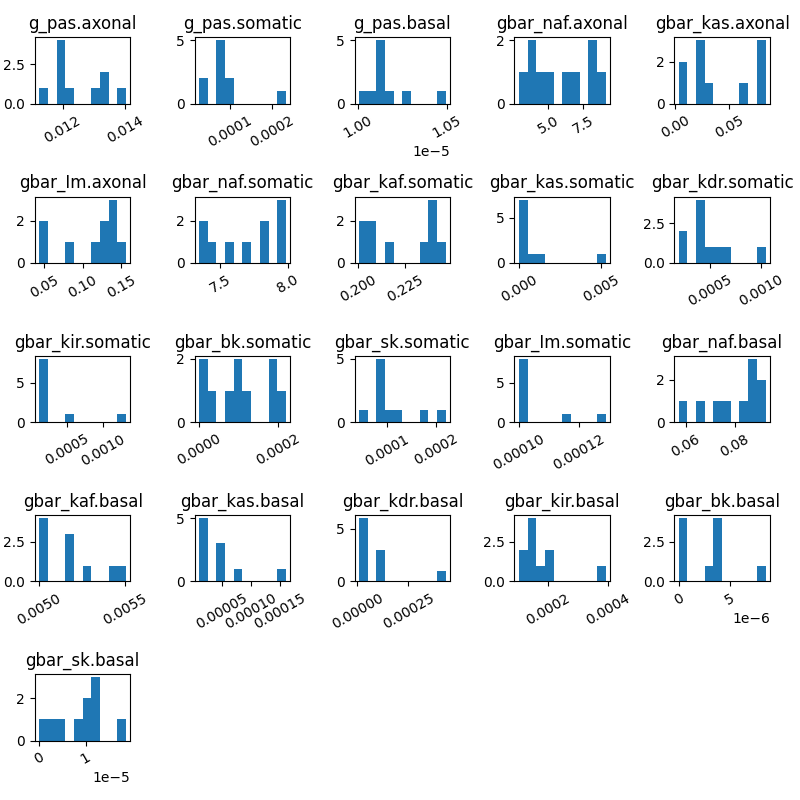

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


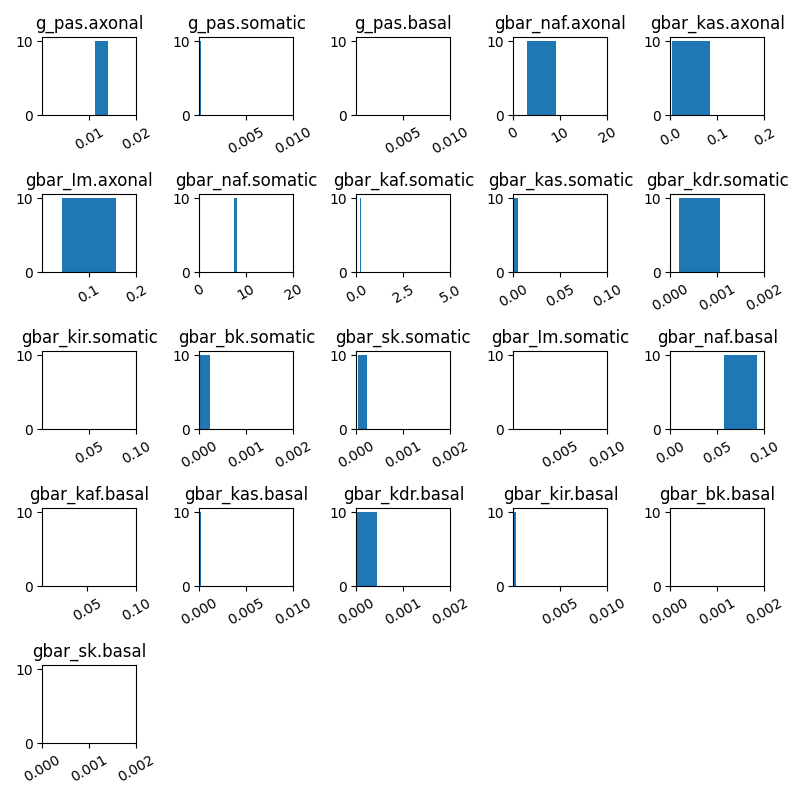

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


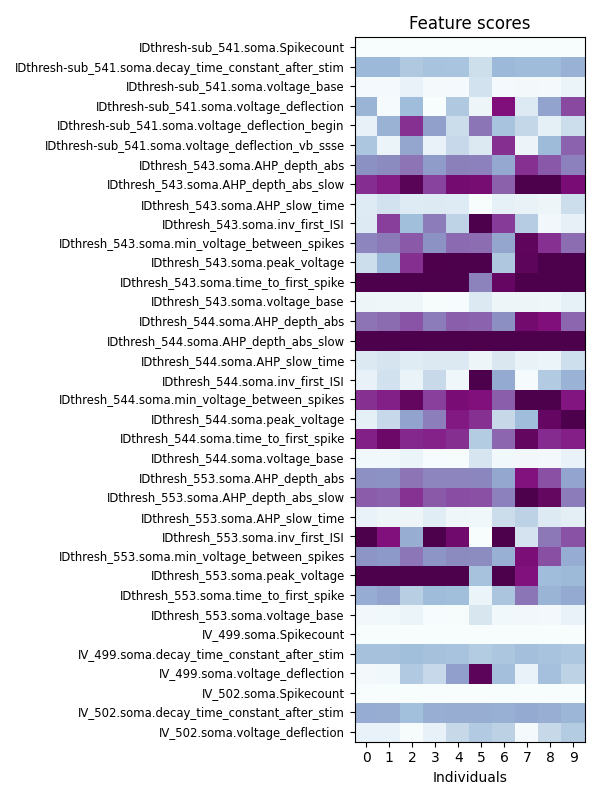

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [28]:
ind = 0
test_parameters = best_models[ind]

In [29]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


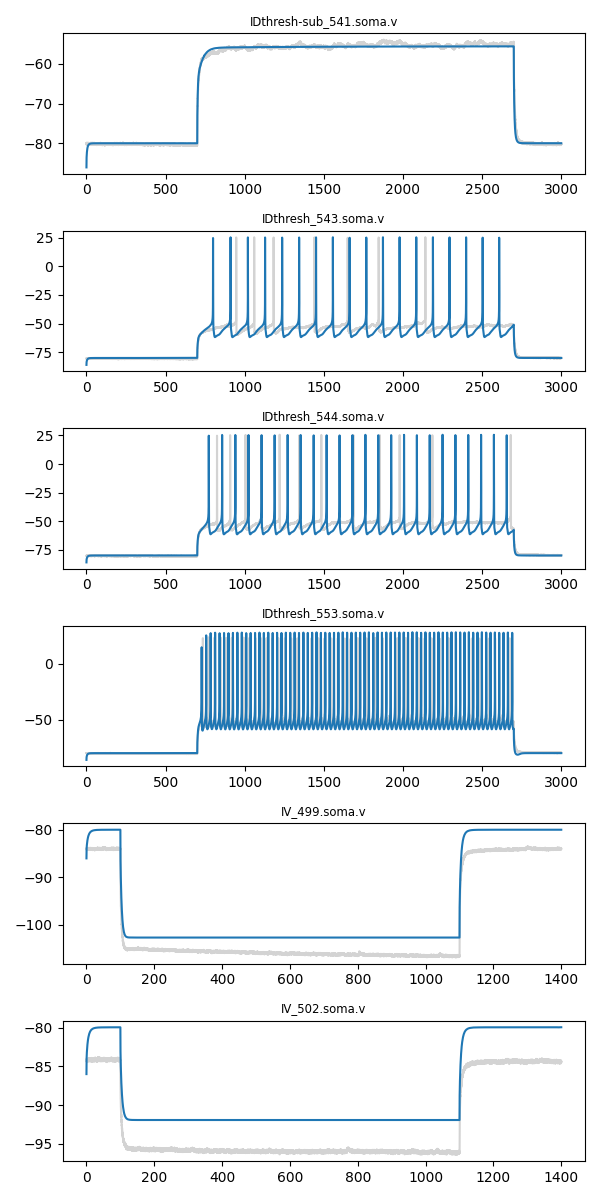

In [30]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


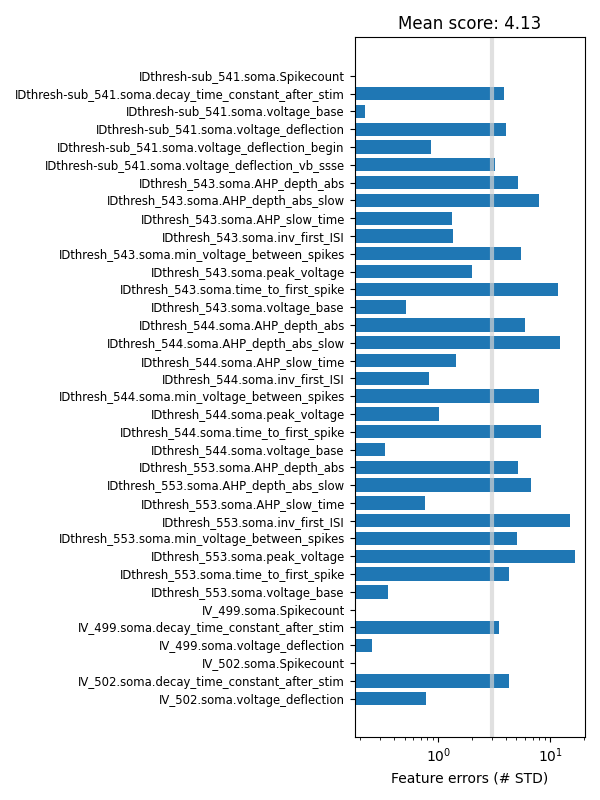

In [31]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [22]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.120000,1.430000,1.140000,1.930000,1.620000,1.670000,2.050000,2.070000,2.160000
1,1.120000,0.000000,1.060000,1.420000,1.750000,1.800000,1.890000,1.970000,2.050000,2.020000
2,1.430000,1.060000,0.000000,1.700000,2.070000,2.070000,2.070000,2.190000,2.080000,2.170000
3,1.140000,1.420000,1.700000,0.000000,1.880000,1.310000,1.810000,1.790000,1.830000,2.210000
4,1.930000,1.750000,2.070000,1.880000,0.000000,2.040000,1.820000,2.110000,2.100000,1.900000
5,1.620000,1.800000,2.070000,1.310000,2.040000,0.000000,1.900000,1.930000,2.080000,2.330000
6,1.670000,1.890000,2.070000,1.810000,1.820000,1.900000,0.000000,2.070000,2.150000,1.760000
7,2.050000,1.970000,2.190000,1.790000,2.110000,1.930000,2.070000,0.000000,1.990000,1.930000
8,2.070000,2.050000,2.080000,1.830000,2.100000,2.080000,2.150000,1.990000,0.000000,2.200000
9,2.160000,2.020000,2.170000,2.210000,1.900000,2.330000,1.760000,1.930000,2.200000,0.000000


In [23]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)